In [1]:
import IPython as IP
IP.get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as plt
import control
from control import *

In [2]:
def BioPlant_GR_TF():
    A_gr=[[0,-0.068],[-0.75,-0.1302]]
    B_gr=[[-0.9951],[2.4878]]
    C_gr=[1,0]
    D_gr=[0]
    TF_gr=control.ss2tf(A_gr, B_gr, C_gr, D_gr)
    return TF_gr

In [3]:
def BioPlant_ST_TF():
    A_st=[[0, 0.9056], [-0.75, -2.564]]
    B_st=[[-1.5301],[3.8255]]
    C_st=[1,0]
    D_st=[0]
    TF_st=control.ss2tf(A_st, B_st, C_st, D_st)
    return TF_st

In [4]:
def Result_Plotter(Time,yout):
    plt.plot(Time, yout)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Step response for BioPlant controller')
    plt.grid()

In [5]:
def PID_TF_Generator(D,P,I):
    PID_Num=[D,P,I]
    PID_Den=[1,0]
    PID_TF=control.tf(PID_Num,PID_Den)
    return PID_TF

In [6]:
def PID_Plant_Response(PID_TF,TF_gr):
    FeedBack = feedback(PID_TF*TF_gr,1)
    Time=list(np.arange(0,40,0.1))
    Time, yout = control.step_response(sys=FeedBack,T=Time,X0=0)
    return Time,yout

In [7]:
def BioPlant_Error_Generator(D,P,I):
    TF_gr=BioPlant_GR_TF()
    w1=5
    w2=5
    w3=1
    w4=1
    w5=4
    w6=0

    PID_TF=PID_TF_Generator(D,P,I)
    Time,yout=PID_Plant_Response(PID_TF,TF_gr)

    Yout_np=np.array(yout.copy())
    Error=1-Yout_np
    Absolute_Error=np.abs(Error)
    Square_Error=Error**2
    Overshoot=np.max(Yout_np)-1

    Overshoot_Index=np.where(Yout_np==(1+Overshoot))[0]
    Overshoot_location=np.argmax(yout)/10
    #Sliced_Square_Error=Square_Error[:Overshoot_Index[0]]
    #Rise_Time_Index=np.where(Sliced_Square_Error==(np.min(Sliced_Square_Error)))
    
    #Rise_Time=Time[Rise_Time_Index][0]
    Rise_Time=0
    IAE = np.trapz(Absolute_Error, dx=0.01)
    ISE = np.trapz(Square_Error, dx=0.01)
    ITAE = np.trapz((Time*Absolute_Error), dx=0.01)
    ITSE = np.trapz((Time*Square_Error), dx=0.01)

    W=w1*IAE+w2*ISE+w3*ITAE+w4*ITSE+w5*Rise_Time+w6*Overshoot
    return W,yout,Time,IAE,ISE,ITAE,ITSE,Rise_Time,Overshoot

In [8]:
def Particle_Initial_Vel_Pos(swarm_size,dimensions,problem_boundary):
    particle_location = (np.random.rand(swarm_size,dimensions)-0.5)*problem_boundary*2  
    particle_velocity = np.random.rand(swarm_size,dimensions)  
    return  particle_location,particle_velocity

In [9]:
def Particle_best_params(particle_location):    
    Particle_X=particle_location[:,0]
    Particle_Y=particle_location[:,1]
    Particle_Z=particle_location[:,2]
    particle_best_value=[]
    for particle in range(len(particle_location)):
        particle_value,*_=BioPlant_Error_Generator(Particle_X[particle],Particle_Y[particle],Particle_Z[particle])
        particle_best_value.append(particle_value)
    particle_best_location = np.copy(particle_location)
        
    return particle_best_value,particle_best_location

In [10]:
def Global_best(particle_best_value):
    global_best_value = np.min(particle_best_value)
    global_best_location = particle_location[np.argmin(particle_best_value)].copy()
    return global_best_value,global_best_location

In [11]:
def Plot_Error_Per_Generation(best_score_progress):
    plt.plot(best_score_progress)
    plt.xlabel('Generation')
    plt.ylabel('Best score')
    plt.show()

In [12]:
def Result_Plotter(Time,yout):
    plt.plot(Time, yout)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Step response for BioPlant controller')
    plt.grid()
    plt.show()

C:\Users\Dara\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
C:\Users\Dara\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in multiply
C:\Users\Dara\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


solution at D=-1.59, P=-3.70,I=-1.67


C:\Users\Dara\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply


solution at D=-1.59, P=-3.72,I=-1.68
solution at D=-1.64, P=-3.74,I=-1.73
solution at D=-1.66, P=-3.75,I=-1.76
solution at D=-1.68, P=-3.76,I=-1.77
solution at D=-1.68, P=-3.76,I=-1.78
solution at D=-1.68, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.78
solution at D=-1.69, P=-3.76,I=-1.85
solution at D=-1.68, P=-3.76,I=-1.92
solution at D=-1.66, P=-3.77,I=-1.96
solution at D=-1.60, P=-3.77,I=-2.00
solution at D=-1.56, P=-3.77,I=-2.00
solution at D=-1.56, P=-3.77,I=-2.00
solution at D=-1.57, P=-3.77,I=-2.00
solution at D=-1.58, P=-3.79,I=-2.00
solution at D=-1.60, P=-3.85,I=-2.00
solution at D=-1.61, P=-3.94,I=-2.00
solution at D=-1.61, P=-4.00,I=-2.00
solution at D=-1.63, P=-4.00,I=-2.00
s

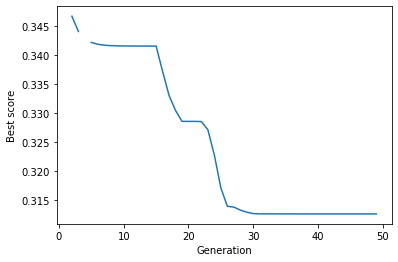

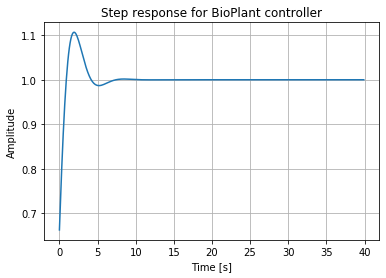

In [13]:
problem_boundary=[2,4,2]
swarm_size = 40          
iterations = 50            
inertia = 0.5            
dimensions = 3           
local_weight = 2                
global_weight =  2          
max_velocity = 0.1             
step_size = 1                    
 
particle_location,particle_velocity=Particle_Initial_Vel_Pos(swarm_size,dimensions,problem_boundary)
particle_best_value,particle_best_location=Particle_best_params(particle_location)
global_best_value,global_best_location=Global_best(particle_best_value)
   
Iteration_Lower_Error = []           
Iteration_Best_Location = []         


for iteration_i in range(iterations): 
    for particle_i in range(swarm_size): 
        for dimension_i in range(dimensions): 
        

            u = np.random.rand(dimensions) 

            error_particle_best = particle_best_location[particle_i,dimension_i]-particle_location[particle_i,dimension_i]
            error_global_best = global_best_location[dimension_i] - particle_location[particle_i,dimension_i]         
            v_new = inertia*particle_velocity[particle_i,dimension_i] + local_weight*u[0]*error_particle_best + \
                global_weight*u[1]*error_global_best    
            if v_new < -max_velocity:
                v_new = -max_velocity
            elif v_new > max_velocity:
                v_new = max_velocity
            
            l_new = particle_location[particle_i,dimension_i] + v_new*step_size
            
            if l_new < -problem_boundary[dimension_i]:
                l_new= -problem_boundary[dimension_i]
            elif l_new > problem_boundary[dimension_i]:
                l_new = problem_boundary[dimension_i]
                
            particle_location[particle_i,dimension_i] = l_new     
            particle_velocity[particle_i,dimension_i] = v_new
        
        v,*_ = BioPlant_Error_Generator(particle_location[particle_i,0],particle_location[particle_i,1],particle_location\
                                    [particle_i,2])

        if v < particle_best_value[particle_i]: 
            particle_best_value[particle_i]=v
            particle_best_location[particle_i,:] = particle_location[particle_i,:].copy()

        if v < global_best_value:
            global_best_value=v
            global_best_location = particle_location[particle_i,:].copy()


    print('solution at D='+'%.2f' % global_best_location[0]+', P='+'%.2f' % global_best_location[1]+',I='+'%.2f' %\
         global_best_location[2])


    
    v,*_ = Particle_best_params(particle_location.copy())
    Iteration_Lower_Error.append(np.min(v))
    Iteration_Best_Location.append(particle_location[np.argmin(v),:])

    

Plot_Error_Per_Generation(Iteration_Lower_Error)
X_final=Iteration_Best_Location[-1][0]
Y_final=Iteration_Best_Location[-1][1]
Z_final=Iteration_Best_Location[-1][1]
W_Champ,yout_Champ,Time_Champ,IAE,ISE,ITAE,ITSE,Rise_Time,Overshoot=BioPlant_Error_Generator(X_final,Y_final,Z_final)
Result_Plotter(Time_Champ,yout_Champ)

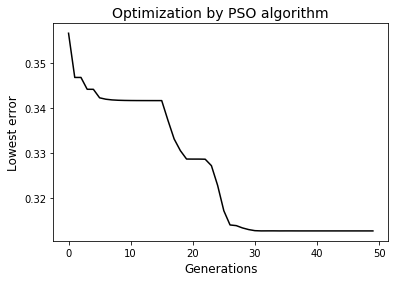

In [21]:
plt.plot(Iteration_Lower_Error,'k')
plt.xlabel('Generations',fontsize=12)
plt.ylabel('Lowest error',fontsize=12)
plt.title('Optimization by PSO algorithm',fontsize=14)
plt.savefig("Optimization by PSO algorithm.png")
plt.show()

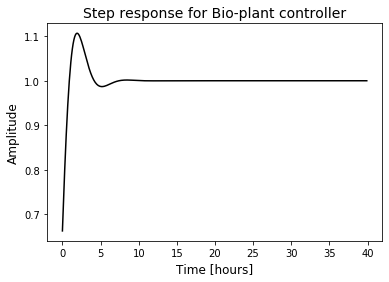

In [22]:
plt.plot(Time_Champ,yout_Champ,'k')
plt.xlabel('Time [hours]',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.title('Step response for Bio-plant controller',fontsize=14)
plt.savefig("Response by PSO algorithm.png")
plt.show()

In [16]:
print(Iteration_Lower_Error)

[nan, nan, 0.3467470914244404, 0.3441150380195558, nan, 0.3422155478344263, 0.3419052097387236, 0.3417500271606259, 0.3416724325495384, 0.3416336371839527, 0.3416142563121044, 0.3416045658280382, 0.3415997205739997, 0.3415972979440423, 0.3415960866282506, 0.3415954809702041, 0.3372233174183788, 0.3330684198779408, 0.33047181956159233, 0.3285975780147014, 0.32858797615600843, 0.32858833394641435, 0.3285600981164707, 0.3271263072738272, 0.32273883616774535, 0.31709615804504987, 0.3139371897756823, 0.3137896536073109, 0.3132773018517469, 0.3129101144982376, 0.31266933673154945, 0.3126161972014536, 0.3126218938848896, 0.312624373637972, 0.31261260373400207, 0.312618107762018, 0.3126168121476104, 0.3126124718647627, 0.31261247299208367, 0.31261281228547766, 0.3126126192728551, 0.31261214019808264, 0.3126124352795197, 0.3126120004966119, 0.3126124558894709, 0.3126121959471642, 0.31261231275942847, 0.31261202165038166, 0.31261204428137046, 0.31261205399763176]


In [20]:
Iteration_Lower_Error[0]=0.3565784456787878
Iteration_Lower_Error[1]=0.3467470914244404
Iteration_Lower_Error[4]=0.3441067676343488

In [18]:
print(Iteration_Lower_Error)

[0.3565784456787878, 0.3467470914244404, 0.3467470914244404, 0.3441150380195558, 0.3444567676343488, 0.3422155478344263, 0.3419052097387236, 0.3417500271606259, 0.3416724325495384, 0.3416336371839527, 0.3416142563121044, 0.3416045658280382, 0.3415997205739997, 0.3415972979440423, 0.3415960866282506, 0.3415954809702041, 0.3372233174183788, 0.3330684198779408, 0.33047181956159233, 0.3285975780147014, 0.32858797615600843, 0.32858833394641435, 0.3285600981164707, 0.3271263072738272, 0.32273883616774535, 0.31709615804504987, 0.3139371897756823, 0.3137896536073109, 0.3132773018517469, 0.3129101144982376, 0.31266933673154945, 0.3126161972014536, 0.3126218938848896, 0.312624373637972, 0.31261260373400207, 0.312618107762018, 0.3126168121476104, 0.3126124718647627, 0.31261247299208367, 0.31261281228547766, 0.3126126192728551, 0.31261214019808264, 0.3126124352795197, 0.3126120004966119, 0.3126124558894709, 0.3126121959471642, 0.31261231275942847, 0.31261202165038166, 0.31261204428137046, 0.312612